In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img = np.asarray(Image.open('cameraman.tif'))

In [3]:
img.shape

(256, 256)

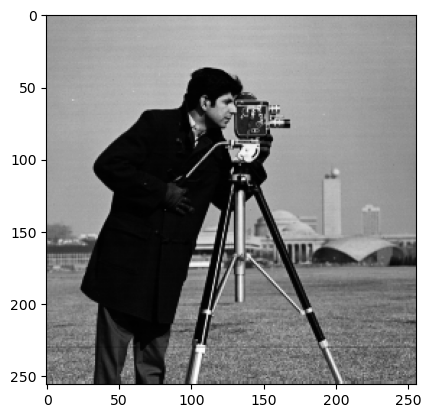

In [4]:
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
def mashtab(img, a = 0, b = 255):
    return (img - img.min()) / (img.max() - img.min()) * (b - a) + a

In [6]:
def conv(image, kernel):
    image_h = image.shape[0]
    image_w= image.shape[1]
    kernel_h =  kernel.shape[0]
    kernel_w= kernel.shape[1]
    h = kernel_h//2
    w = kernel_w//2
    image_conv = np.zeros(image.shape)
    for i in range(h, image_h-h): 
        for j in range(w, image_w - w): 
            sum = 0
            for m in range(kernel_h):
                for n in range(kernel_w):
                    sum = sum + kernel[m][n]*image[i-h+m][j-w+n]
            image_conv[i][j] = sum
    return image_conv

In [7]:
sobel_3 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_5 = np.array([[-1 / 4 , -1 / 2 , 0 , 1 / 2 , 1 / 4], 
                    [-1 / 2 , -1 , 0 , 1 , 1 / 2], 
                    [-1 , -2 , 0 , 2 , 1], 
                    [-1 / 2 , -1 , 0 , 1 , 1 / 2], 
                    [-1 / 4 , -1 / 2 , 0 , 1 / 2 , 1 / 4]])

In [8]:
img_sobel3 = mashtab(np.sqrt(np.power(conv(img, sobel_3), 2) + np.power(conv(img, sobel_3.T), 2)))
img_sobel5 = mashtab(np.sqrt(np.power(conv(img, sobel_5), 2) + np.power(conv(img, sobel_5.T), 2)))

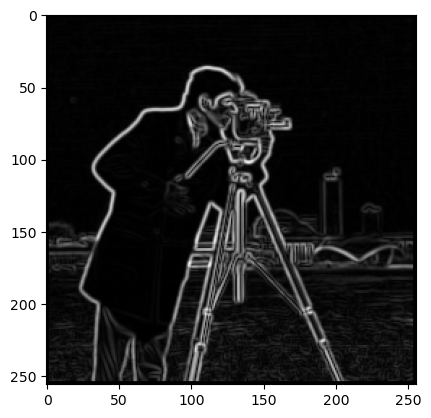

In [10]:
plt.imshow(img_sobel5, cmap=plt.get_cmap('gray'), vmin=0,vmax=255)
plt.show()

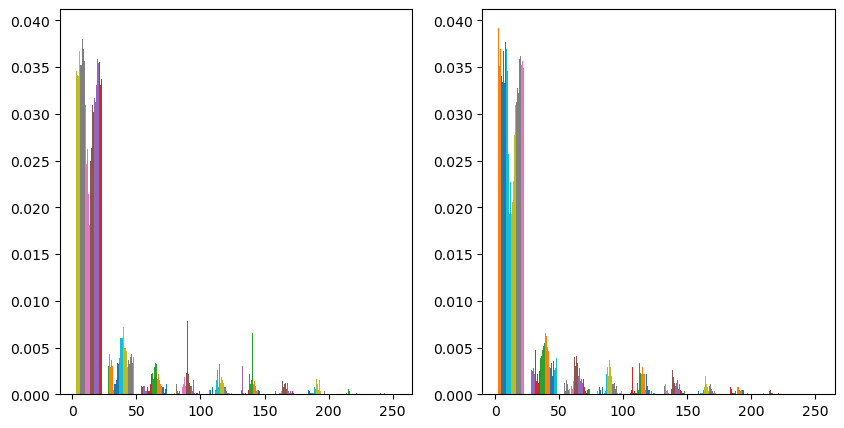

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(mashtab(img_sobel3), density=True)
axs[1].hist(mashtab(img_sobel5), density=True)
plt.show()

## Функція препарування з параметрами a=0, b=80

In [52]:
def f(x):
    a = 0
    k= 0.4
    b = 25
    if x < a:
        return 0
    elif x < b / k:
        return (x - a) * k
    else :
        return b
    
def g(x):
    return 255 - x

g = np.vectorize(g)
f = np.vectorize(f)

img3 = (mashtab(f(img_sobel3)))
img5 = (mashtab(f(img_sobel5)))

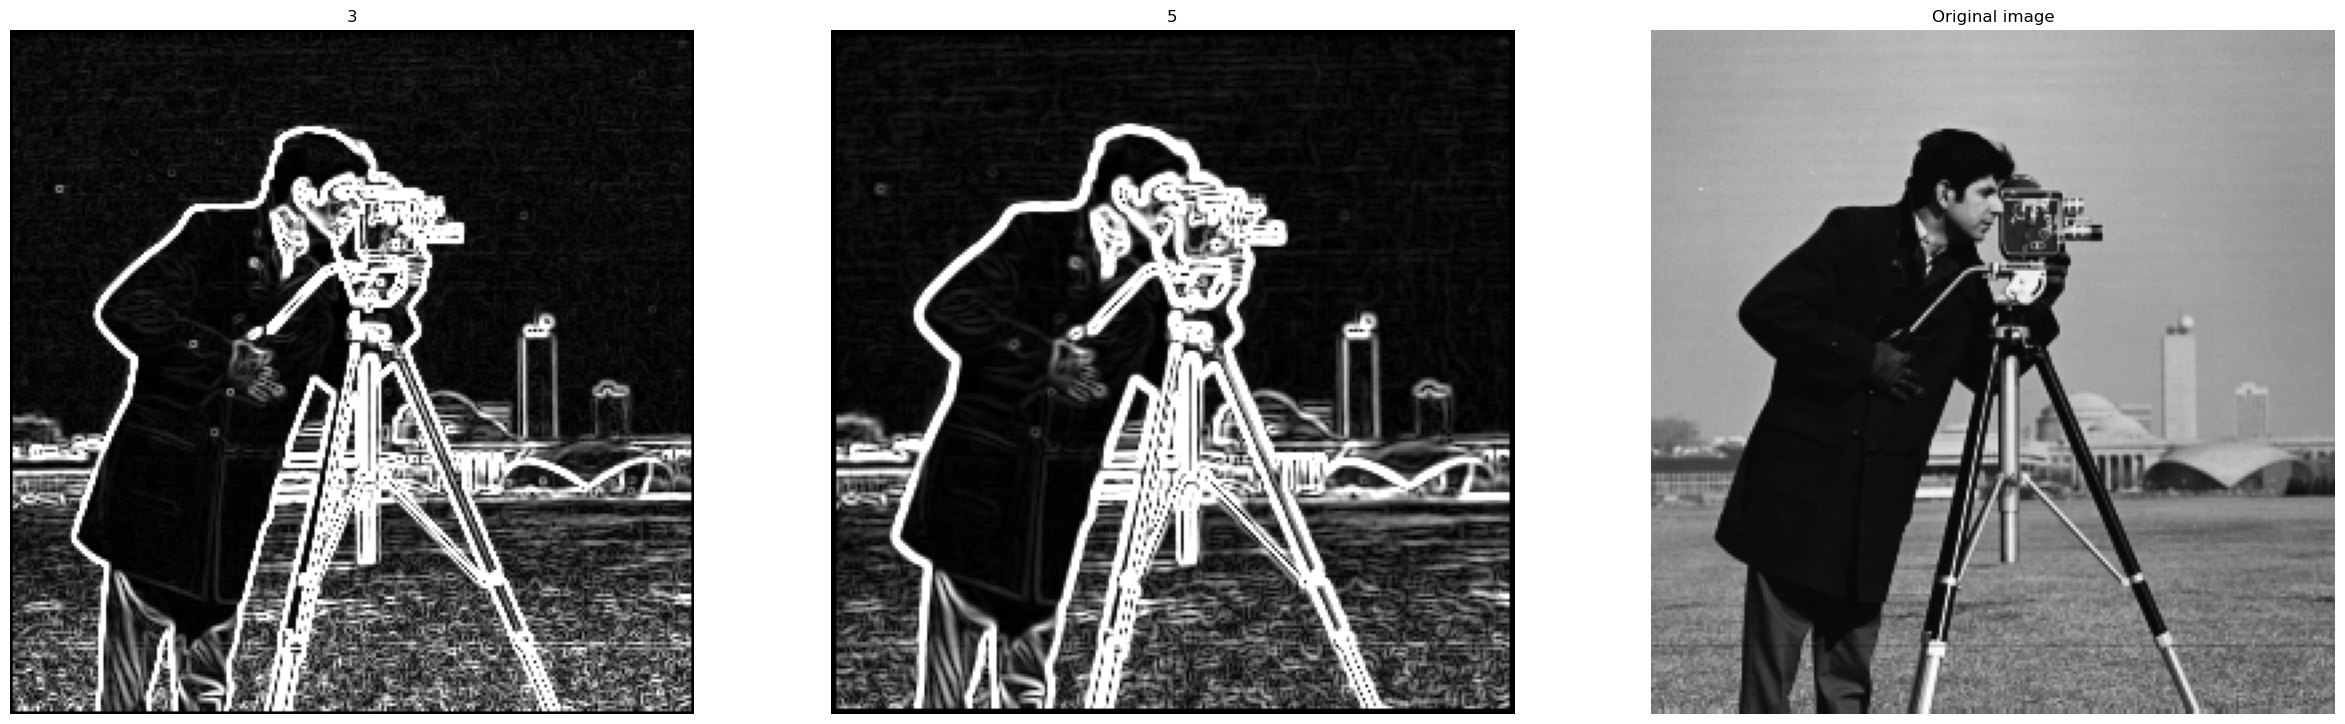

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
axs[0].imshow(img3, cmap=plt.get_cmap('gray'), vmin=0,vmax=255)
axs[0].set_title('3')
axs[0].axis('off')
axs[1].imshow(img5, cmap=plt.get_cmap('gray'), vmin=0,vmax=255)
axs[1].set_title('5')
axs[1].axis('off')
axs[2].imshow(img, cmap=plt.get_cmap('gray'), vmin=0,vmax=255)
axs[2].set_title('Original image')
plt.axis('off')
plt.show()

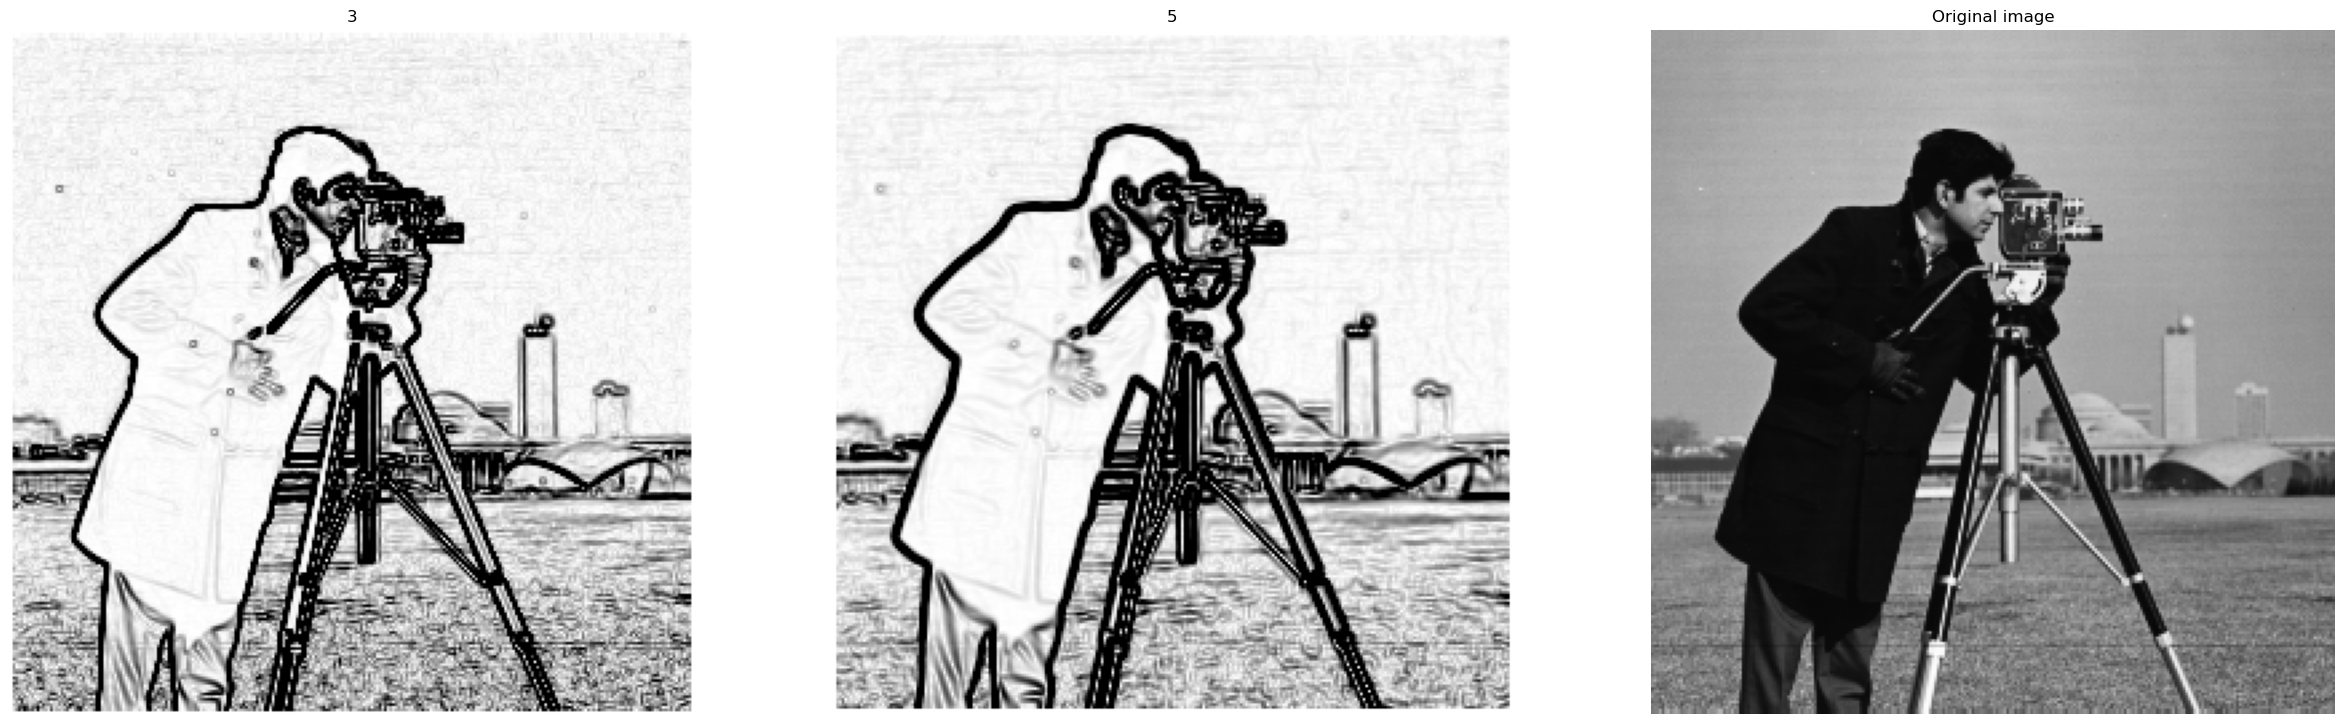

In [54]:
img3 = g(img3)
img5 = g(img5)

fig, axs = plt.subplots(1, 3, figsize=(30, 10))
axs[0].imshow(img3, cmap=plt.get_cmap('gray'), vmin=0,vmax=255)
axs[0].set_title('3')
axs[0].axis('off')
axs[1].imshow(img5, cmap=plt.get_cmap('gray'), vmin=0,vmax=255)
axs[1].set_title('5')
axs[1].axis('off')
axs[2].imshow(img, cmap=plt.get_cmap('gray'), vmin=0,vmax=255)
axs[2].set_title('Original image')
plt.axis('off')
plt.show()